In [1]:
from memflow.phasespace import phasespace
import tensorflow as tf
from memflow.hardscatter import hardscatter
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

/home/valsdav/code/MEM/MEMFlow/myenv/lib64/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-12-22 15:26:28.578486: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 15:26:29.340934: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/LHAPDF/lib:/opt/MG5_aMC_v3_4_1/lib:/.singularity.d/libs
2022-12-22 15:26:29.341094: W tensorflow/compiler/xla/stream_execut

In [2]:
import pdfflow
pdf = pdfflow.mkPDF("NNPDF40_nnlo_hessian_pdfas/0")
pdf.trace()

2022-12-22 15:26:30.269604: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/LHAPDF/lib:/opt/MG5_aMC_v3_4_1/lib:/.singularity.d/libs
2022-12-22 15:26:30.269635: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
[INFO] (pdfflow.pflow) Loading member 0 from NNPDF40_nnlo_hessian_pdfas
[INFO] (pdfflow.pflow) Building tf.Graph, this can take a while...


In [11]:
TOP_MASS = 172.76
HIGGS_MASS = 125.25
E_CM = 13000
final_masses = torch.tensor([HIGGS_MASS, TOP_MASS, TOP_MASS], requires_grad=False)
N = 100000

In [49]:
p, w , x1, x2, wpdf = phasespace.generate_random_phase_space_points(N, E_CM, [21,21], final_masses, pdf=pdf)

In [13]:
V = phasespace.rambo_generator.FlatInvertiblePhasespace.get_flatWeights(E_CM, 3)

In [50]:
def eval_smatrix(momenta):
    inputs = np.transpose(momenta.numpy(), (0,2,1))
    output = torch.zeros((momenta.shape[0]))
    for i in range(inputs.shape[0]):
        output[i] = hardscatter.smatrix_ttH([21,21,25,6,-6], inputs[i])
    return output

In [51]:
out = eval_smatrix(p)

In [52]:
out

tensor([2.6741e-08, 2.4747e-08, 4.5315e-07,  ..., 1.1443e-07, 2.4266e-07,
        3.4619e-07])

Text(0.5, 0, '$log_{10}(XS)$')

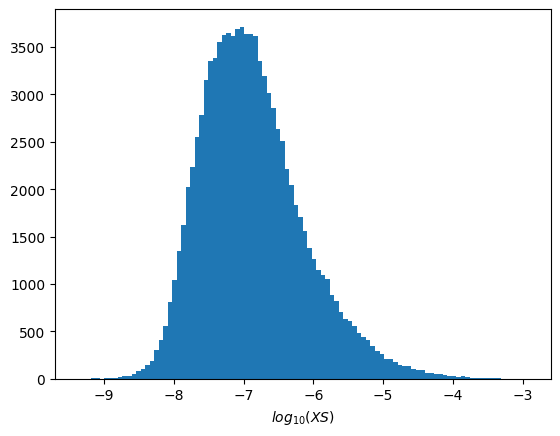

In [53]:
plt.hist(np.log10(out), bins=100)
plt.xlabel("$log_{10}(XS)$")

In [54]:
torch.sum(w*out*wpdf.flatten())/ N

tensor(3.6726e-12, dtype=torch.float64)

/tmp/ipykernel_156134/299989781.py:1: RuntimeWarning: invalid value encountered in log10
  plt.hist2d((x1*x2).numpy(), np.log10(w.numpy()), bins=100, range=((0,1),(-18,0)),


Text(0, 0.5, 'jacobian')

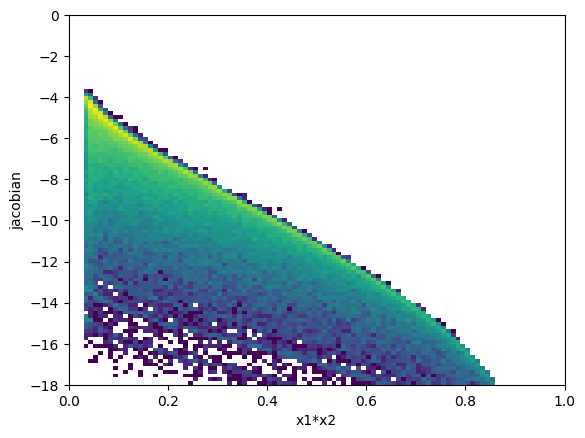

In [55]:
plt.hist2d((x1*x2).numpy(), np.log10(w.numpy()), bins=100, range=((0,1),(-18,0)),
          norm=colors.LogNorm())
plt.xlabel("x1*x2")
plt.ylabel("jacobian")

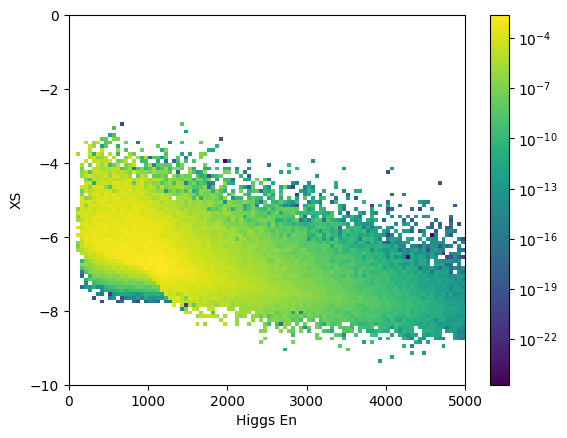

In [70]:
plt.hist2d(p[:,2,0].numpy(), np.log10(out.numpy()), 
           weights=w,
           bins=(100,100), range=((0,5000),(-10,0)),
          norm=colors.LogNorm())
plt.xlabel("Higgs En")
plt.ylabel("XS")
plt.colorbar()

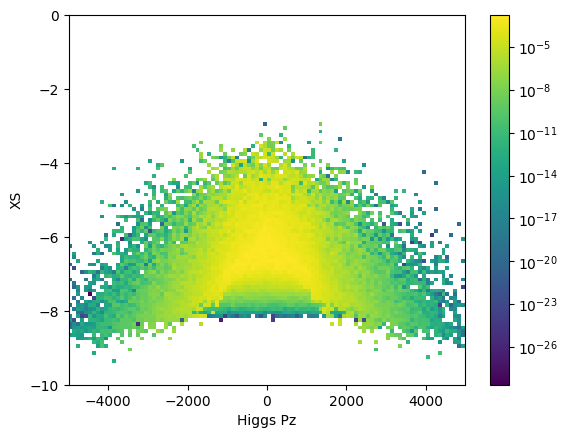

In [71]:
plt.hist2d(p[:,2,3].numpy(), np.log10(out.numpy()), 
           weights=w,
           bins=(100,100), range=((-5000,5000),(-10,0)),
          norm=colors.LogNorm())
plt.xlabel("Higgs Pz")
plt.ylabel("XS")
plt.colorbar()

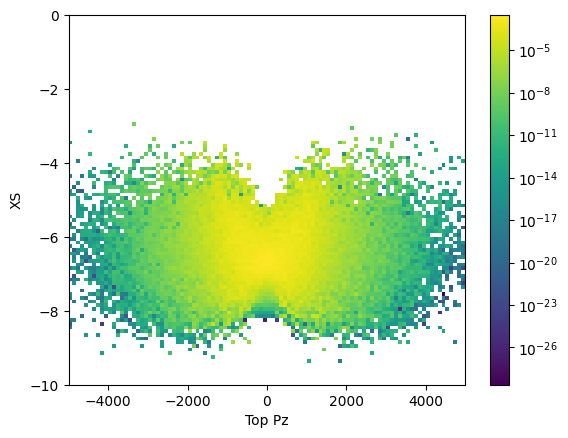

In [72]:
plt.hist2d(p[:,3,3].numpy(), np.log10(out.numpy()), 
           weights=w,
           bins=(100,100), range=((-5000,5000),(-10,0)),
          norm=colors.LogNorm())
plt.xlabel("Top Pz")
plt.ylabel("XS")
plt.colorbar()